Import libraries and data set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Create path
path= r'C:\Users\jerem\anaconda\Happiness Project\Data'

In [3]:
# Import data
happi= pd.read_pickle(os.path.join(path, 'happi.pkl'))

Exploratory Analysis

In [4]:
# Create subset for analysis
happi.head()

Country  Happiness Rank  Happiness Score  Economy GDPP  Family Social  \
0  Switzerland               1            7.587       1.39651        1.34951   
1      Iceland               2            7.561       1.30232        1.40223   
2      Denmark               3            7.527       1.32548        1.36058   
3       Norway               4            7.522       1.45900        1.33095   
4       Canada               5            7.427       1.32629        1.32261   

   Life Expectancy  Freedom    Trust  Generosity  Year GDPP category  
0          0.94143  0.66557  0.41978     0.29678  2015     High GDPP  
1          0.94784  0.62877  0.14145     0.43630  2015     High GDPP  
2          0.87464  0.64938  0.48357     0.34139  2015     High GDPP  
3          0.88521  0.66973  0.36503     0.34699  2015     High GDPP  
4          0.90563  0.63297  0.32957     0.45811  2015     High GDPP

In [5]:
happy = happi[['Happiness Rank', 'Happiness Score', 'Economy GDPP', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']]

In [6]:
happy.head()

Happiness Rank  Happiness Score  Economy GDPP  Life Expectancy  Freedom  \
0               1            7.587       1.39651          0.94143  0.66557   
1               2            7.561       1.30232          0.94784  0.62877   
2               3            7.527       1.32548          0.87464  0.64938   
3               4            7.522       1.45900          0.88521  0.66973   
4               5            7.427       1.32629          0.90563  0.63297   

     Trust  Generosity  
0  0.41978     0.29678  
1  0.14145     0.43630  
2  0.48357     0.34139  
3  0.36503     0.34699  
4  0.32957     0.45811

In [7]:
# Create correlation heat map
happy.corr()

Happiness Rank  Happiness Score  Economy GDPP  \
Happiness Rank         1.000000        -0.992066     -0.794791   
Happiness Score       -0.992066         1.000000      0.789284   
Economy GDPP          -0.794791         0.789284      1.000000   
Life Expectancy       -0.743655         0.742456      0.784338   
Freedom               -0.537942         0.551258      0.340511   
Trust                 -0.372162         0.397821      0.304181   
Generosity            -0.117713         0.137578     -0.014560   

                 Life Expectancy   Freedom     Trust  Generosity  
Happiness Rank         -0.743655 -0.537942 -0.372162   -0.117713  
Happiness Score         0.742456  0.551258  0.397821    0.137578  
Economy GDPP            0.784338  0.340511  0.304181   -0.014560  
Life Expectancy         1.000000  0.340745  0.250463    0.010638  
Freedom                 0.340745  1.000000  0.459520    0.290706  
Trust                   0.250463  0.459520  1.000000    0.318945  
Generosity              0.010638  0.290706  0.318945    1.000000

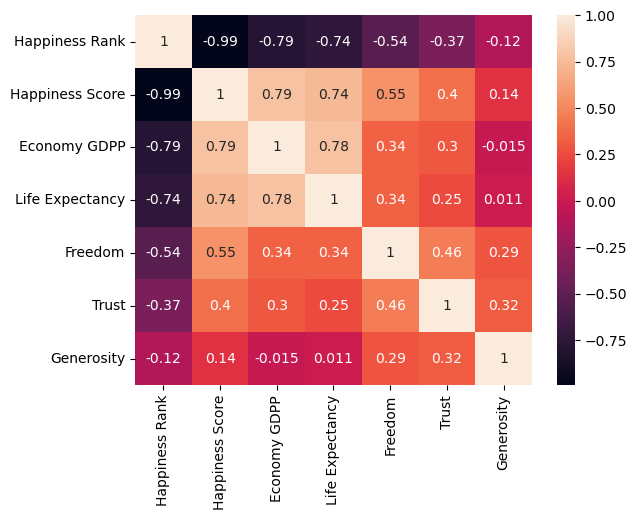

In [8]:
corr=sns.heatmap(happy.corr(), annot=True)

The coefficients that say 1 are variables crossed with themselves, so we ignore it. It seems Happiness Score and Happiness Rank are negatively related, but that makes sense since as your happiness score goes up, so does your rank. However, the number of the rank doesn't truely resemble the rank itself. Economy GDPP seems to be closely correlated with the score, rank, and life expectancy. Freedom, trust, and generosity have smaller correlation coefficients.

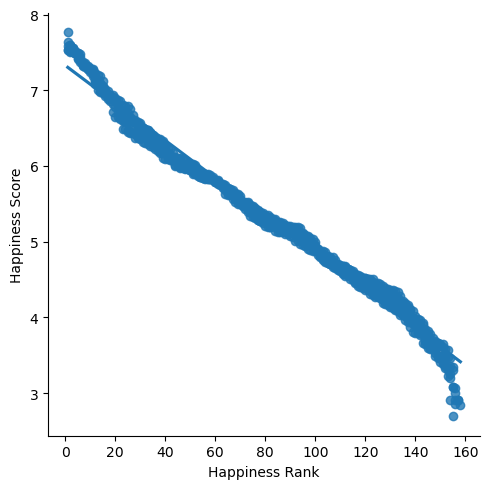

In [21]:
# Create scatterplot
scatter=sns.lmplot(x = 'Happiness Rank', y = 'Happiness Score', data = happy)

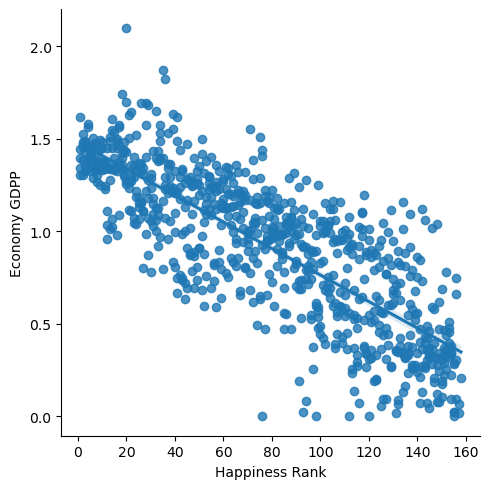

In [22]:
scattera=sns.lmplot(x = 'Happiness Rank', y = 'Economy GDPP', data = happy)

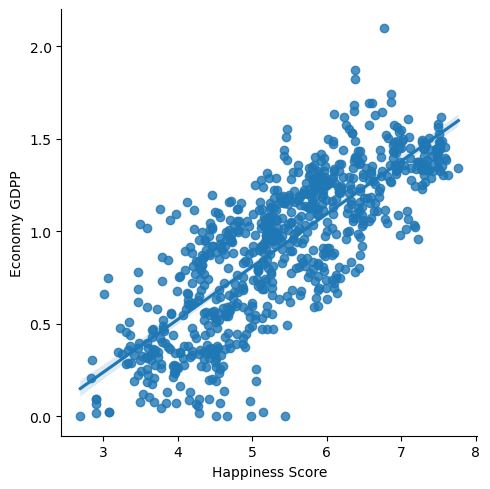

In [23]:
scatterb=sns.lmplot(x = 'Happiness Score', y = 'Economy GDPP', data = happy)

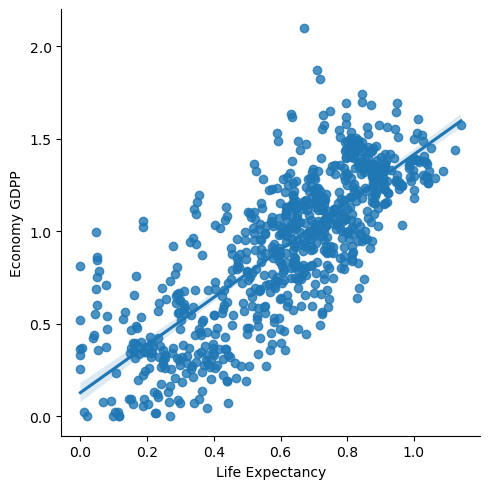

In [24]:
scatterc=sns.lmplot(x = 'Life Expectancy', y = 'Economy GDPP', data = happy)

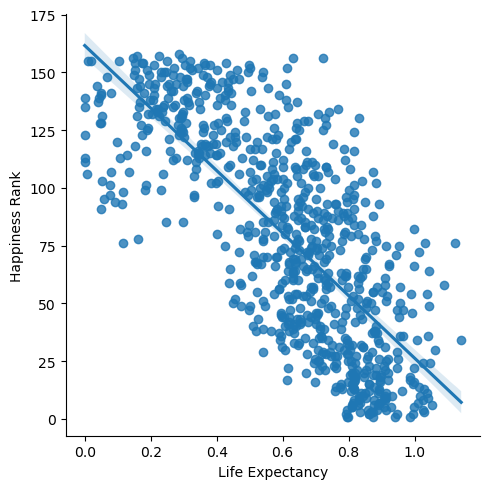

In [25]:
scatterd=sns.lmplot(x = 'Life Expectancy', y = 'Happiness Rank', data = happy)

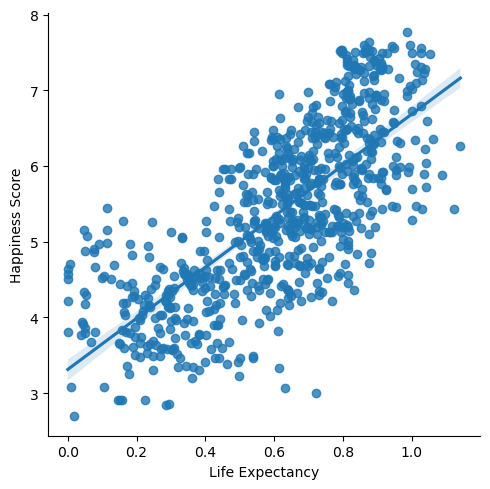

In [26]:
scattere=sns.lmplot(x = 'Life Expectancy', y = 'Happiness Score', data = happy)

Happiness Score and Happiness rank have a very tight relationship, which is to be expected. The other variables are more loosely correlated, but they do not have any funky outliers where a non-linear trend line would fit better.

In [11]:
# Create a pair plot
happe=happi[['Year', 'Life Expectancy', 'Economy GDPP', 'Happiness Score']]

In [12]:
happe.head()

Year  Life Expectancy  Economy GDPP  Happiness Score
0  2015          0.94143       1.39651            7.587
1  2015          0.94784       1.30232            7.561
2  2015          0.87464       1.32548            7.527
3  2015          0.88521       1.45900            7.522
4  2015          0.90563       1.32629            7.427

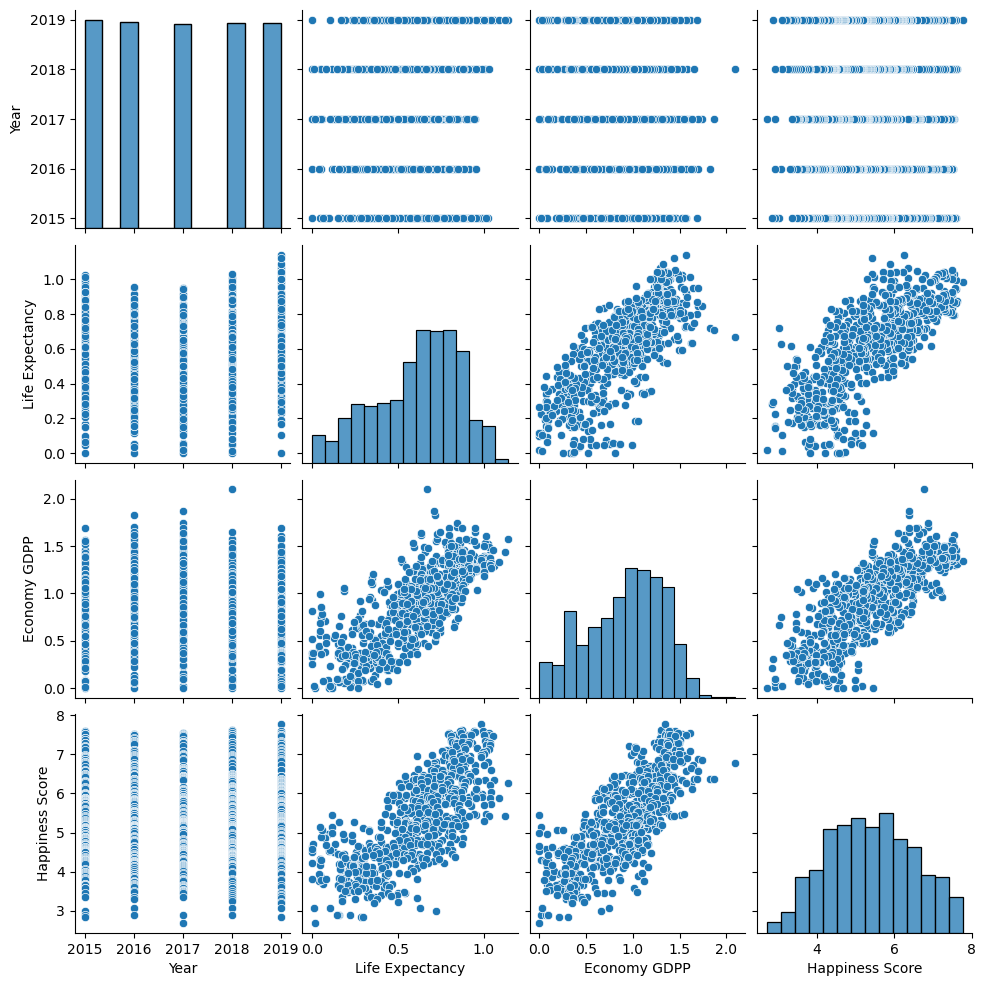

In [13]:
pair=sns.pairplot(happe)

The year variable presents in almost distinct columns. It seems that year doesn't have an impact on any of the variables. All of the other variables have stronger correlations. I would like to explore the score, life expectancy, and GDPP since they all seem to be related.

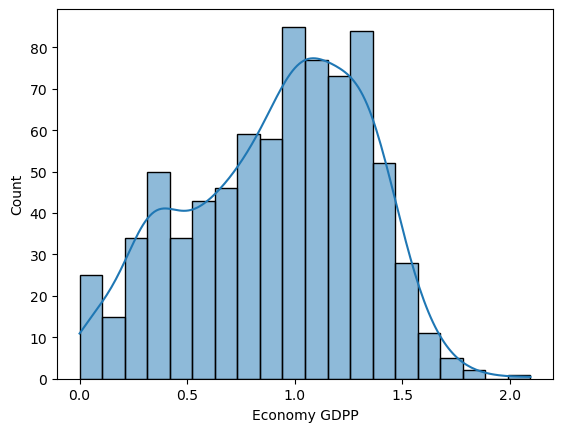

In [30]:
# Create catplot
hist=sns.histplot(happi['Economy GDPP'], bins = 20, kde = True)

In [31]:
happi.loc[happi['Economy GDPP'] < .75, 'GDPP category'] = 'Low GDPP'

In [32]:
happi.loc[(happi['Economy GDPP'] >= .75) & (happi['Economy GDPP'] < 1.25), 'GDPP category'] = 'Mid GDPP'

In [33]:
happi.loc[happi['Economy GDPP'] >= 1.25, 'GDPP category'] = 'High GDPP'

In [34]:
happi['GDPP category'].value_counts(dropna = False)

GDPP category
Mid GDPP     337
Low GDPP     257
High GDPP    188
Name: count, dtype: int64

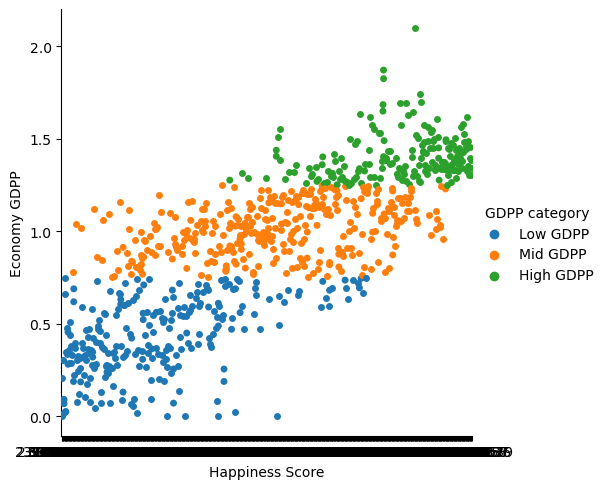

In [35]:
cat=sns.catplot(data=happi, x='Happiness Score', y='Economy GDPP', hue='GDPP category')

It seems that the higher GDPP has a higher happiness score than low and mid. Low and mid can have higher happiness scores, but it seems higher GDPP only have mid-high happiness scores.

Countries with higher ranks/scores seem to have higher GDPP. Same goes for life expectancy. Years does not have an affect/is affected. It looks like almost all variables are higher with higher scores, just to varying degrees.

If GDPP rises, the happiness scores will go up. If life expectancy rises, then scores will rise too.

In [36]:
happi.shape

(782, 11)

In [39]:
# Export
happi.to_pickle(os.path.join(path, 'happi'))

In [37]:
happi.to_csv(os.path.join(path, 'happi.csv'))

In [9]:
corr.figure.savefig(os.path.join(path, 'corr'))

In [14]:
pair.figure.savefig(os.path.join(path, 'pair'))